# 3 EDA I: Continuous and Categorical Data

Reading the book [Humanities Data and R](http://humanitiesdata.org)

# 3.2 Tables

In [48]:
geodf = read.csv('data/ch03/geodf.csv', as.is=TRUE)
dim(geodf)

[1] 826   6

In [49]:
head(geodf)

,state,fips,county,csa,population,households
1,or,1950100,Baker,None,2725,1225
2,or,1950200,Baker,None,3179,1322
3,or,1950300,Baker,None,2395,1162
4,or,1950400,Baker,None,2975,1397
5,or,1950500,Baker,None,2969,1117
6,or,1950600,Baker,None,1812,897


In [50]:
geodf[1:6,]

,state,fips,county,csa,population,households
1,or,1950100,Baker,None,2725,1225
2,or,1950200,Baker,None,3179,1322
3,or,1950300,Baker,None,2395,1162
4,or,1950400,Baker,None,2975,1397
5,or,1950500,Baker,None,2969,1117
6,or,1950600,Baker,None,1812,897


In [51]:
tab = table(geodf$county)
tab


     Baker     Benton  Clackamas    Clatsop   Columbia       Coos      Crook 
         6         18         80         11         10         13          4 
     Curry  Deschutes    Douglas    Gilliam      Grant     Harney Hood River 
         5         24         22          1          2          2          4 
   Jackson  Jefferson  Josephine    Klamath       Lake       Lane    Lincoln 
        41          6         16         20          2         86         17 
      Linn    Malheur     Marion     Morrow  Multnomah       Polk    Sherman 
        21          7         58          2        171         12          1 
 Tillamook   Umatilla      Union    Wallowa      Wasco Washington    Wheeler 
         8         15          8          3          8        104          1 
   Yamhill 
        17 

In [52]:
tab[order(tab, decreasing=TRUE)]

Multnomah Washington       Lane  Clackamas     Marion    Jackson  Deschutes 
       171        104         86         80         58         41         24 
   Douglas       Linn    Klamath     Benton    Lincoln    Yamhill  Josephine 
        22         21         20         18         17         17         16 
  Umatilla       Coos       Polk    Clatsop   Columbia  Tillamook      Union 
        15         13         12         11         10          8          8 
     Wasco    Malheur      Baker  Jefferson      Curry      Crook Hood River 
         8          7          6          6          5          4          4 
   Wallowa      Grant     Harney       Lake     Morrow    Gilliam    Sherman 
         3          2          2          2          2          1          1 
   Wheeler 
         1

In [53]:
names(tab)[order(tab, decreasing=TRUE)][1:5]

[1] "Multnomah"  "Washington" "Lane"       "Clackamas"  "Marion"

In [54]:
tab2 = table(geodf$county, geodf$csa)
tab2

            
             Bend Medford None Portland
  Baker         0       0    6        0
  Benton        0       0   18        0
  Clackamas     0       0    0       80
  Clatsop       0       0   11        0
  Columbia      0       0    0       10
  Coos          0       0   13        0
  Crook         4       0    0        0
  Curry         0       0    5        0
  Deschutes    24       0    0        0
  Douglas       0       0   22        0
  Gilliam       0       0    1        0
  Grant         0       0    2        0
  Harney        0       0    2        0
  Hood River    0       0    4        0
  Jackson       0      41    0        0
  Jefferson     0       0    6        0
  Josephine     0      16    0        0
  Klamath       0       0   20        0
  Lake          0       0    2        0
  Lane          0       0   86        0
  Lincoln       0       0   17        0
  Linn          0       0   21        0
  Malheur       0       0    7        0
  Marion        0       0  

# 3.3 Histogram

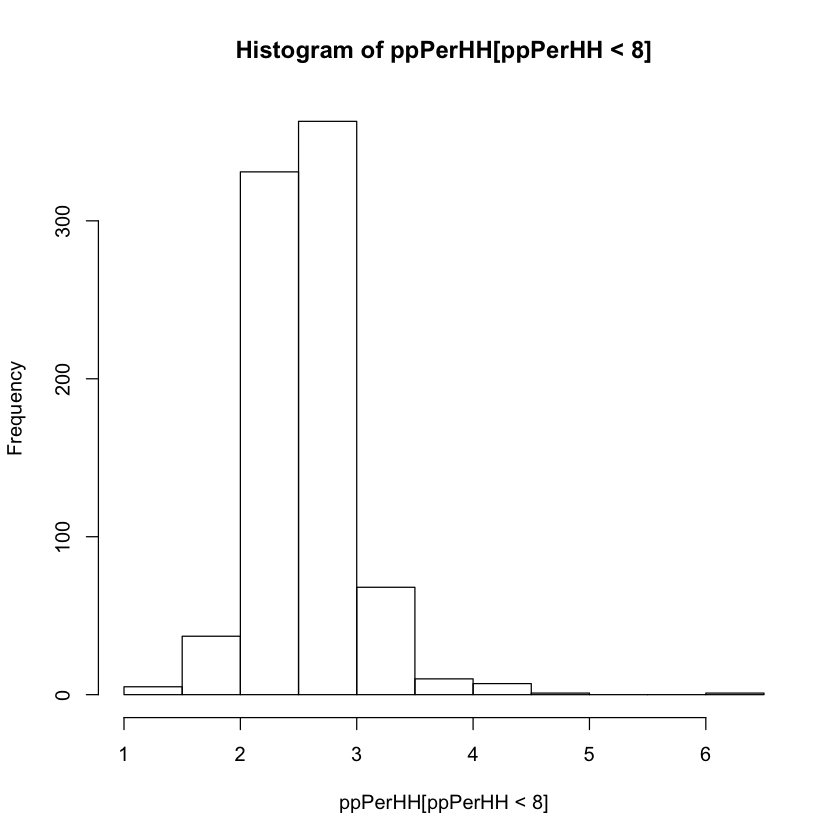

In [55]:
ppPerHH = geodf$population / geodf$households
hist(ppPerHH[ppPerHH < 8])

# 3.4 Quantiles

In [1]:
meansOfCommute = read.csv('data/ch03/meansOfCommute.csv', as.is=TRUE)
meansOfCommute = as.matrix(meansOfCommute)
head(meansOfCommute)

total,car,public_trans,bus,subway,railroad,ferry,bike,walk,taxi,work_at_home
1242,984,0,0,0,0,0,8,62,40,148
1199,1036,0,0,0,0,0,34,38,14,77
999,849,0,0,0,0,0,21,16,0,113
1035,954,0,0,0,0,0,4,43,0,34
1123,938,0,0,0,0,0,40,55,21,69
719,572,10,10,0,0,0,4,44,9,80


In [4]:
walkPerc = meansOfCommute[, "walk"]/meansOfCommute[,"total"]
walkPerc = round(walkPerc * 100)
head(walkPerc)

[1] 5 3 2 4 5 6

In [6]:
meansOfCommute = read.csv('data/ch03/meansOfCommute.csv', as.is=TRUE)
walkPercA = meansOfCommute$walk/meansOfCommute$total
walkPercA = round(walkPercA * 100)
head(walkPercA)

[1] 5 3 2 4 5 6

In [58]:
quantile(walkPerc)

0%  25%  50%  75% 100% 
   0    1    3    5   50

In [59]:
carPerc = meansOfCommute[, "car"]/meansOfCommute[,"total"]
carPerc = round(carPerc * 100)
head(carPerc)
quantile(carPerc)

[1] 79 86 85 92 84 80

0%  25%  50%  75% 100% 
  22   78   85   89   98

In [60]:
decile_probs = (0:10)/10
quantile(walkPerc, prob=decile_probs)
quantile(carPerc, prob=decile_probs)

0%  10%  20%  30%  40%  50%  60%  70%  80%  90% 100% 
   0    0    1    2    2    3    3    5    6   10   50

0%  10%  20%  30%  40%  50%  60%  70%  80%  90% 100% 
  22   66   76   80   83   85   87   89   90   92   98

In [61]:
centile_probs = seq(0, 1, length.out=101)
centile_probs

[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
 [16] 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 [31] 0.30 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44
 [46] 0.45 0.46 0.47 0.48 0.49 0.50 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59
 [61] 0.60 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74
 [76] 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89
 [91] 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.00

In [62]:
cent = quantile(walkPerc, prob=centile_probs)
round(cent, 1)

0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  3.0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  4.0  4.0  4.0 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
 4.0  4.0  4.0  4.0  4.0  4.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  6.0  6.0 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
 6.0  6.0  7.0  7.0  7.0  8.0  8.0  8.0  9.0  9.0 10.0 10.0 11.0 12.0 13.5 15.0 
 96%  97%  98%  99% 100% 
18.0 20.0 22.5 31.8 50.0

In [63]:
coff = quantile(carPerc, prob=0.1)
coff

10% 
 66

In [64]:
lowCarUsageFlag = carPerc < coff

In [65]:
table(lowCarUsageFlag, geodf$csa)

               
lowCarUsageFlag Bend Medford None Portland
          FALSE   28      54  336      327
          TRUE     0       3   23       55

# 3.5 Binning

In [66]:
breakPoints = quantile(carPerc, prob=decile_probs)
breakPoints

0%  10%  20%  30%  40%  50%  60%  70%  80%  90% 100% 
  22   66   76   80   83   85   87   89   90   92   98

In [67]:
bin = cut(carPerc, breakPoints, labels=FALSE, include.lowest=TRUE)
head(bin)

[1] 3 6 5 9 5 3

In [68]:
table(bin)

bin
  1   2   3   4   5   6   7   8   9  10 
 87  93  86  89  68  94 104  45  88  72 

In [69]:
table(bin, geodf$csa)

    
bin  Bend Medford None Portland
  1     0       3   24       60
  2     2       5   28       58
  3     4       4   30       48
  4     1       3   41       44
  5     1       3   34       30
  6     1       5   44       44
  7     8      15   43       38
  8     2       5   22       16
  9     6       8   48       26
  10    3       6   45       18

In [70]:
bins = cut(
    ppPerHH, 
    breaks=seq(1, 5, by=0.1), 
    labels=FALSE,
    include.lowest=TRUE,
)

In [71]:
quantile(ppPerHH[ppPerHH < 8], prob=centile_probs)

0%       1%       2%       3%       4%       5%       6%       7% 
1.385468 1.646641 1.814376 1.917529 1.967377 1.998579 2.021985 2.067938 
      8%       9%      10%      11%      12%      13%      14%      15% 
2.091147 2.114445 2.126617 2.137649 2.143808 2.163632 2.177556 2.196051 
     16%      17%      18%      19%      20%      21%      22%      23% 
2.209837 2.224175 2.245663 2.259924 2.269314 2.280028 2.290965 2.295536 
     24%      25%      26%      27%      28%      29%      30%      31% 
2.305563 2.317486 2.333672 2.342224 2.350664 2.360973 2.367115 2.379466 
     32%      33%      34%      35%      36%      37%      38%      39% 
2.391145 2.396646 2.408126 2.415097 2.424898 2.426433 2.434451 2.444882 
     40%      41%      42%      43%      44%      45%      46%      47% 
2.449848 2.462659 2.475125 2.481519 2.491866 2.498393 2.505731 2.514676 
     48%      49%      50%      51%      52%      53%      54%      55% 
2.519180 2.525528 2.535234 2.539600 2.553333 2.558863 2.566856 2.574508 
     56%      57%      58%      59%      60%      61%      62%      63% 
2.578164 2.587277 2.595336 2.602768 2.609434 2.617504 2.623093 2.629115 
     64%      65%      66%      67%      68%      69%      70%      71% 
2.644702 2.653043 2.662139 2.671689 2.682674 2.693175 2.705665 2.715193 
     72%      73%      74%      75%      76%      77%      78%      79% 
2.726050 2.736813 2.744706 2.761935 2.771640 2.782506 2.803237 2.811807 
     80%      81%      82%      83%      84%      85%      86%      87% 
2.817957 2.832131 2.847397 2.856923 2.871391 2.882808 2.900502 2.940300 
     88%      89%      90%      91%      92%      93%      94%      95% 
2.966734 2.984359 3.012145 3.031019 3.064350 3.084606 3.108985 3.142348 
     96%      97%      98%      99%     100% 
3.246787 3.355944 3.594340 4.042072 6.281250

In [72]:
bins = cut(ppPerHH[ppPerHH < 8], breaks=seq(1.3, 6.5, by=0.1),
          labels=FALSE, include.lowest=TRUE
)
table(bins)

bins
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   3   2   5   4   8  18  26  57  69  83  96 110  90  66  68  29  34  18   8 
 21  22  23  24  25  26  27  28  29  32  34  50 
  5   3   2   2   2   1   3   2   4   1   1   1 

# 3.6 Control Flow

In [73]:
hhIncome = read.csv(
    'data/ch03/hhIncome.csv', 
    as.is=TRUE, check.names=FALSE,
)
hhIncome = as.matrix(hhIncome)
head(hhIncome)

total,0k,10k,15k,20k,25k,30k,35k,40k,45k,50k,60k,75k,100k,125k,150k,200k
1225,113,60,42,87,50,27,48,90,77,86,183,94,132,86,24,26
1322,119,162,93,81,91,15,27,72,43,139,113,160,56,106,22,23
1162,107,69,107,116,60,127,44,88,92,129,86,94,4,8,5,26
1397,168,188,89,98,84,89,51,58,83,107,146,140,34,24,24,14
1117,70,131,93,73,66,60,76,89,112,107,90,93,29,3,0,25
897,75,81,70,69,67,56,47,71,72,47,99,53,46,27,6,11


In [74]:
oneRow = hhIncome[1, -1]
oneRow

0k  10k  15k  20k  25k  30k  35k  40k  45k  50k  60k  75k 100k 125k 150k 200k 
 113   60   42   87   50   27   48   90   77   86  183   94  132   86   24   26

In [75]:
cumsum(oneRow)

0k  10k  15k  20k  25k  30k  35k  40k  45k  50k  60k  75k 100k 125k 150k 200k 
 113  173  215  302  352  379  427  517  594  680  863  957 1089 1175 1199 1225

In [76]:
cumIncome = matrix(0, ncol=ncol(hhIncome)-1, nrow=nrow(hhIncome))

In [77]:
for (j in 1:nrow(hhIncome)){
    cumIncome[j,] = cumsum(hhIncome[j, -1]) / hhIncome[j, 1]
    cumIncome[j,] = round(cumIncome[j,] * 100)
}
colnames(cumIncome) = colnames(hhIncome)[-1]
head(cumIncome)

0k,10k,15k,20k,25k,30k,35k,40k,45k,50k,60k,75k,100k,125k,150k,200k
9,14,18,25,29,31,35,42,48,56,70,78,89,96,98,100
9,21,28,34,41,42,44,50,53,64,72,84,89,97,98,100
9,15,24,34,40,50,54,62,70,81,88,96,97,97,98,100
12,25,32,39,45,51,55,59,65,73,83,93,96,97,99,100
6,18,26,33,39,44,51,59,69,79,87,95,97,98,98,100
8,17,25,33,40,47,52,60,68,73,84,90,95,98,99,100


The same can be achieved with ``apply``:

In [78]:
cumIncome = t(apply(hhIncome[,-1], 1, cumsum))
cumIncome = round(cumIncome * 100 / hhIncome[,1])
head(cumIncome)

0k,10k,15k,20k,25k,30k,35k,40k,45k,50k,60k,75k,100k,125k,150k,200k
9,14,18,25,29,31,35,42,48,56,70,78,89,96,98,100
9,21,28,34,41,42,44,50,53,64,72,84,89,97,98,100
9,15,24,34,40,50,54,62,70,81,88,96,97,97,98,100
12,25,32,39,45,51,55,59,65,73,83,93,96,97,99,100
6,18,26,33,39,44,51,59,69,79,87,95,97,98,98,100
8,17,25,33,40,47,52,60,68,73,84,90,95,98,99,100


In [79]:
bands = colnames(hhIncome)[-1]
bands
bands[-length(bands)]
bands[-1]
bandNames = paste(bands[-length(bands)],'-',bands[-1], sep='')
bandNames = c(bandNames, '200k+')

[1] "0k"   "10k"  "15k"  "20k"  "25k"  "30k"  "35k"  "40k"  "45k"  "50k" 
[11] "60k"  "75k"  "100k" "125k" "150k" "200k"

[1] "0k"   "10k"  "15k"  "20k"  "25k"  "30k"  "35k"  "40k"  "45k"  "50k" 
[11] "60k"  "75k"  "100k" "125k" "150k"

[1] "10k"  "15k"  "20k"  "25k"  "30k"  "35k"  "40k"  "45k"  "50k"  "60k" 
[11] "75k"  "100k" "125k" "150k" "200k"

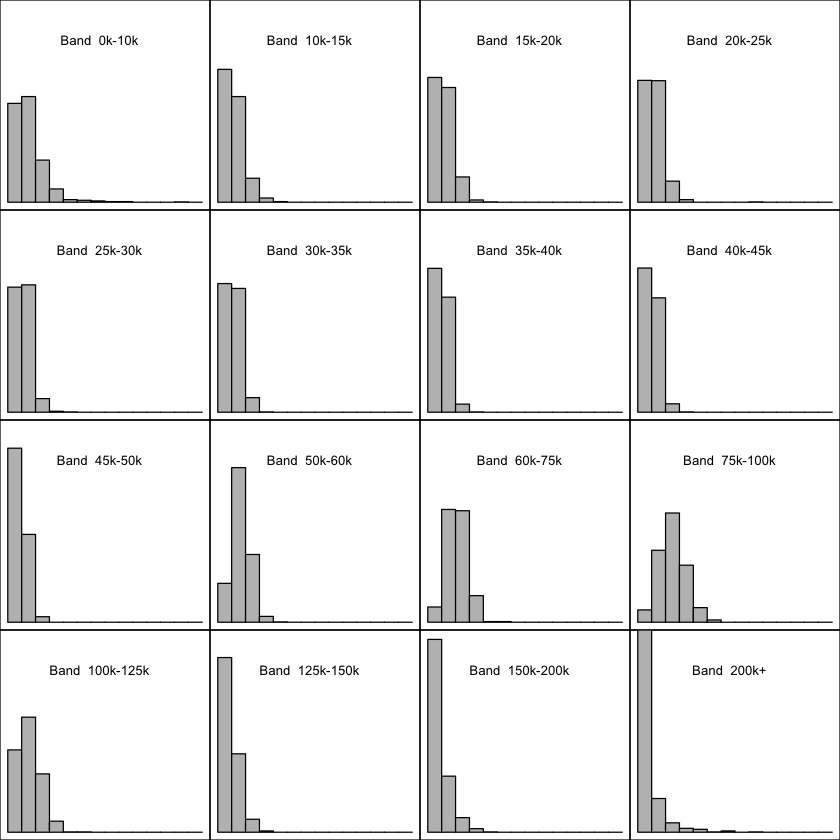

In [80]:
par(mfrow=c(4,4))
par(mar=c(0,0,0,0))
for (j in 1:16) {
    hist(
        hhIncome[,j+1]/hhIncome[,1],
        breaks=seq(0,0.7,by=0.05),
        ylim=c(0,600),
        main="",
        xlab="",
        ylab="",
        axes=FALSE,
        col="grey",
    )
    box()
    text(
        x=0.33, y=500,
        label=paste("Band ", bandNames[j])
    )
}

# 3.8 Aggregation

In [81]:
csaSet = unique(geodf$csa)
csaSet
popTotal = rep(0, length(csaSet))
names(popTotal) = csaSet
popTotal
for (j in 1:nrow(geodf)) {
    index = match(geodf$csa[j], csaSet)
    popTotal[index] = popTotal[index] + geodf$population[j]
}
popTotal

[1] "None"     "Portland" "Bend"     "Medford"

None Portland     Bend  Medford 
       0        0        0        0

None Portland     Bend  Medford 
 1582446  1816916   181459   287900

In [82]:
wahTotal = rep(0, length(csaSet))
names(wahTotal) = csaSet

for (csa in csaSet) {
    wahTotal[csa] = sum(meansOfCommute[geodf$csa == csa,'work_at_home'])*100
}
wahTotal
wahTotal / popTotal

None Portland     Bend  Medford 
 3938400  5602000   576500   793400

None Portland     Bend  Medford 
2.488805 3.083247 3.177026 2.755818

# 3.9 Applying functions

In [83]:
apply(meansOfCommute[1:10, -1], MARGIN=1, FUN=sum)

[1] 1242 1199  999 1035 1123  729 4080 2042 3608 1315

In [84]:
apply(meansOfCommute, MARGIN=2, FUN=sum)

total          car public_trans          bus       subway     railroad 
     1700451      1394475        70714        55784         5119         2751 
       ferry         bike         walk         taxi work_at_home 
          32        39789        69285        17085       109103

In [85]:
help(tapply)

tapply {base},R Documentation
X,"an atomic object, typically a vector."
INDEX,"list of one or more factors, each of same length as X. The elements are coerced to factors by as.factor."
FUN,"the function to be applied, or NULL. In the case of functions like +, %*%, etc., the function name must be backquoted or quoted. If FUN is NULL, tapply returns a vector which can be used to subscript the multi-way array tapply normally produces."
...,optional arguments to FUN: the Note section.
simplify,"If FALSE, tapply always returns an array of mode ""list"". If TRUE (the default), then if FUN always returns a scalar, tapply returns an array with the mode of the scalar."


In [87]:
wahTotal = tapply(
    X=meansOfCommute[, "work_at_home"],
    INDEX=geodf$csa,
    FUN=sum
)
wahTotal

Bend  Medford     None Portland 
    5765     7934    39384    56020